In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Sampling

In reality, real signals (for example EEGs) are not continous and we cannot decompose it into a infinite series of sines and cosines. They are *sampled* from the signals at a *sampling rate*. 

The sampling rate will have an effect of the number of frequencies represented by the Fourier decomposition of the recorded signals.

## Sampling Theory

This is the *fundamental bridge* between continous-time signals and discrete-time signals. Here we explain the reasons for this theory and how best one samples a continous signal to obtain all the important information we are looking for into the discrete case.

We don't go into the details of the theory but in summary, it suggests that we must sample the signal at a rate which is at least twice that of its highest frequency component. 

The highest frequency component that can be resolved for any given sampling rate is called the *nyquist frequency*.


### Aliasing

![Sampling example](https://upload.wikimedia.org/wikipedia/commons/thumb/2/28/AliasingSines.svg/675px-AliasingSines.svg.png)

In the above example taken from Wikipedia, there are two sine waves, with frequencies $f_{red} = 0.9, f_{blue} = 0.1$. The sampling rate here is $f_s = 1$ (dots). We can see that at these dots, both red and blue signals have the same values. Since our sampling rate is 1Hz, the maximum frequency that we can sample and distinguish is 0.5Hz, this means that all other signals will become *aliases*. When we try to recreate the sample, we will only obtain the 0.1Hz signal.

Thus the sampling rate must be **twice** the highest frequency we are using.

[Wikipedia on Sampling Theory](http://en.wikipedia.org/wiki/Nyquist%E2%80%93Shannon_sampling_theorem)

[Wikipedia on Aliasing](https://en.wikipedia.org/wiki/Aliasing)

### Example

Let us consider two signals: 
$$ s_1 = \cos(5.5 \times 2\pi t);~~ s_2 = \cos(4.5 \times 2\pi t) $$
Plotting these signals in evenly spaced intervals over $[0,1]$ gives us the following:

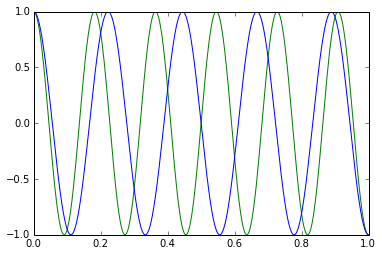

In [2]:
# Our signals:
s_1 = lambda t : np.cos(2*np.pi*5.5*t)
s_2 = lambda t: np.cos(2*np.pi*4.5*t)

## Real signal:
plt.figure()
t_real = np.linspace(0, 1, 1000)
s_1_real = s_1(t_real)
s_2_real = s_2(t_real)
plt.plot(t_real, s_1_real, 'g')
plt.plot(t_real, s_2_real, 'b')
plt.show()


------

### Sampling at $f=10Hz$
Now when we sample the signal at 10Hz (i.e 0.1s intervals).
We get the following result, the signals do not look periodic, and worse is that the look entirely the same, our signal of $f=5.5$ has been *aliased* to that of $f=4.5$.

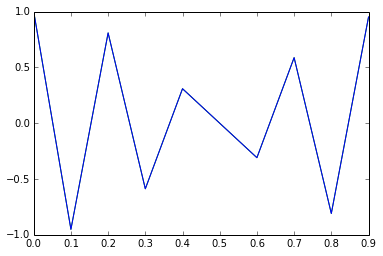

In [3]:
## Sampled Signal:

sample_rate = 10
dt = 1 / float(sample_rate)

plt.figure()
t_sampled = np.arange(0, 1, dt)
s_1_sampled = s_1(t_sampled)
s_2_sampled = s_2(t_sampled)
plt.plot(t_sampled, s_1_sampled, 'g')
plt.plot(t_sampled, s_2_sampled, 'b')
plt.show()


----

### Sampling at $f=11Hz$
If we now use the *sampling theorem* above and sample at twice that of the highest frequency, 11Hz, we obtain two distinguishable plots:


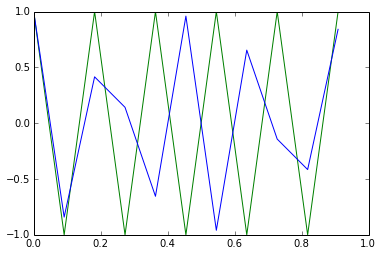

In [4]:
# increased sample rate
sample_rate = 11
dt = 1 / float(sample_rate)

plt.figure()
t_sampled = np.arange(0, 1, dt)
s_1_sampled = s_1(t_sampled)
s_2_sampled = s_2(t_sampled)
plt.plot(t_sampled, s_1_sampled, 'g')
plt.plot(t_sampled, s_2_sampled, 'b')
plt.show()
